In [1]:
%matplotlib notebook
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()

from numpy import array
from matplotlib import cm



from sklearn import preprocessing
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from nltk.corpus import stopwords

import datetime as dt
import warnings
import string
import time
# stop_words = []
warnings.filterwarnings('ignore')
punctuation = string.punctuation


In [2]:
gun_df = pd.read_csv("resources/gunviolencedata.csv", parse_dates=["date"])


gun_df.head()



,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,740176,2017-01-01,Tennessee,Memphis,3000 block of Danville Road,1,0,http://www.gunviolencearchive.org/incident/740176,http://www.wmcactionnews5.com/story/34179388/2...,False,9.0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Dri...",35.0670,Parkway Village,-89.9156,1.0,woman shot and killed when men in vehicle fire...,0::18||1::17||2::22,0::Adult 18+||1::Teen 12-17||2::Adult 18+,0::Female||1::Male||2::Male,0::Kiara Tatum||1::Jaylen Clayton||2::Devante ...,NaN,"0::Killed||1::Unharmed, Arrested||2::Unharmed,...",0::Victim||1::Subject-Suspect||2::Subject-Suspect,http://wreg.com/2017/01/01/memphis-sees-1st-ho...,91.0,33.0
1,741857,2017-01-01,Nebraska,Omaha,N 24th St and Sprague St,0,0,http://www.gunviolencearchive.org/incident/741857,http://www.wowt.com/content/news/New-Years-cel...,False,2.0,0::Unknown,0::Unknown,Shots Fired - No Injuries,41.2960,NaN,-95.9470,1.0,Celebratory gunfire.,0::25,0::Adult 18+,0::Male,0::Kareebo Adams,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.wowt.com/content/news/New-Years-cel...,NaN,11.0
2,741852,2017-01-01,Nebraska,Omaha,S 27th St and Polk St,0,1,http://www.gunviolencearchive.org/incident/741852,http://www.wowt.com/content/news/Teen-arrested...,False,2.0,0::Unknown,0::Unknown,Shot - Wounded/Injured,41.1918,NaN,-95.9528,1.0,NaN,0::23||1::17,0::Adult 18+||1::Teen 12-17,0::Female||1::Male,0::Ana Manriquez,NaN,"0::Injured||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.wowt.com/content/news/Teen-arrested...,NaN,5.0
3,740911,2017-01-01,Pennsylvania,Erie,2134 Glendale Ave,0,1,http://www.gunviolencearchive.org/incident/740911,http://www.erienewsnow.com/story/34164013/71-y...,False,3.0,0::Unknown,0::Unknown,Shot - Wounded/Injured||Domestic Violence,42.1306,NaN,-80.0272,1.0,NaN,0::61||1::71,0::Adult 18+||1::Adult 18+,0::Female||1::Male,NaN,1::Significant others - current or former,"0::Injured||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.erienewsnow.com/story/34164013/71-y...,NaN,NaN
4,744584,2017-01-01,New Mexico,Portales,200 block of S Knoxville St,0,0,http://www.gunviolencearchive.org/incident/744584,http://www.easternnewmexiconews.com/story/2017...,False,3.0,0::Unknown,0::Unknown,Shots Fired - No Injuries,34.1898,NaN,-103.3240,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.easternnewmexiconews.com/story/2017...,63.0,27.0


In [3]:
print("size of data : ", gun_df.shape)

size of data :  (61401, 29)


In [4]:
gun_df.drop(['incident_id', 'address', 
             'incident_url', 'source_url','incident_url_fields_missing','congressional_district',
             'gun_stolen','gun_type','incident_characteristics','location_description','notes',
             'participant_age','participant_age_group','participant_gender','participant_name',
             'participant_relationship','participant_status','participant_type','sources',
             'state_house_district','state_senate_district'], axis=1, inplace=True)
gun_df.head()

,date,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved
0,2017-01-01,Tennessee,Memphis,1,0,35.0670,-89.9156,1.0
1,2017-01-01,Nebraska,Omaha,0,0,41.2960,-95.9470,1.0
2,2017-01-01,Nebraska,Omaha,0,1,41.1918,-95.9528,1.0
3,2017-01-01,Pennsylvania,Erie,0,1,42.1306,-80.0272,1.0
4,2017-01-01,New Mexico,Portales,0,0,34.1898,-103.3240,1.0


In [5]:
gun_df['date'] = date.month['date']

NameError: name 'date' is not defined

In [ ]:
gun_df = gun_df.dropna(how='any')

In [ ]:
gun_df.count()


In [ ]:
gun_df["state"].value_counts()

In [ ]:
gun_df["city_or_county"].value_counts()

In [ ]:
gun_df.describe(include=["O"])

In [ ]:
gun_df.info()

In [ ]:
gun_df.head()

<IPython.core.display.Javascript object>


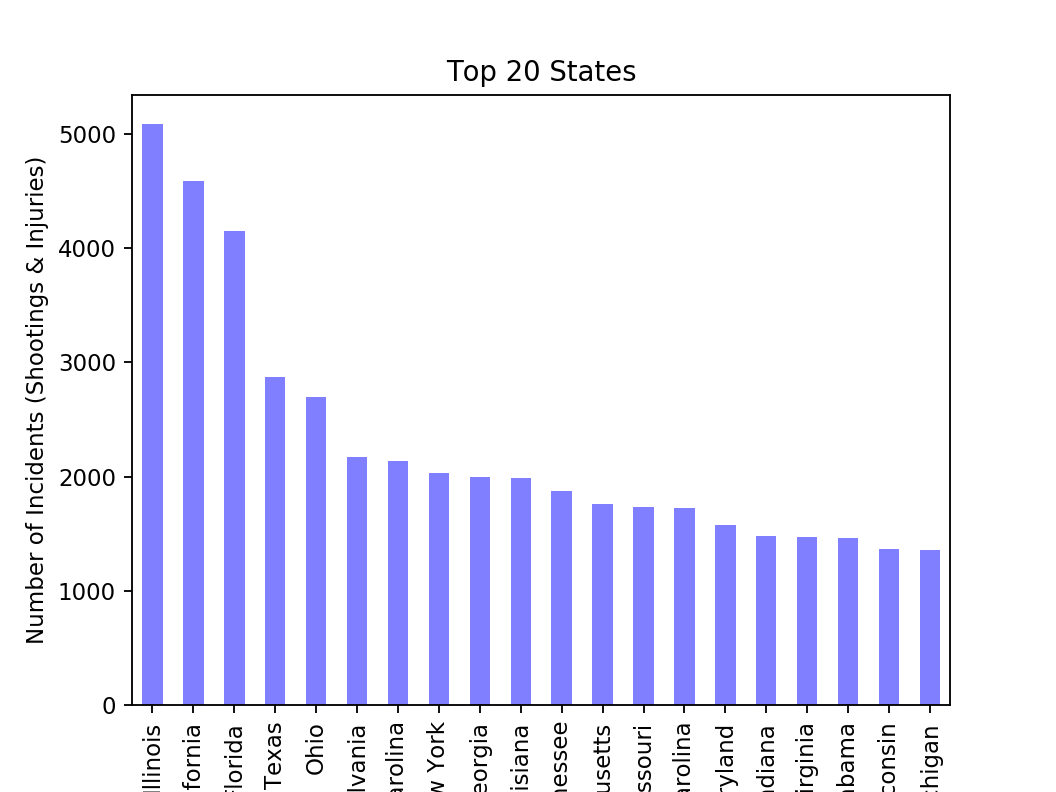

In [19]:
plt.figure(0)
state_data = gun_df["state"].value_counts().head(20)
plt.tight_layout()
plt.title("Top 20 States")
plt.xlabel("State")
plt.ylabel("Number of Incidents (Shootings & Injuries)")
state_data.plot(kind="bar", color='blue', alpha=0.5)
plt.savefig("top_states.png")

<IPython.core.display.Javascript object>


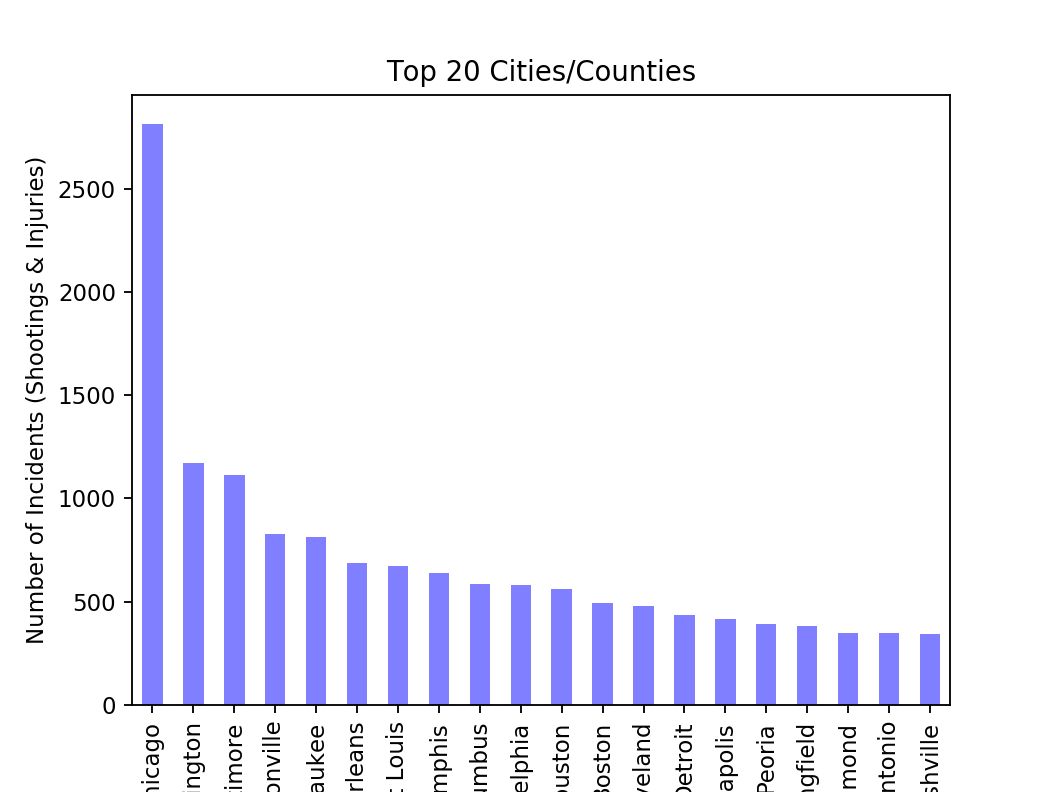

In [20]:
plt.figure(1)
state_data = gun_df["city_or_county"].value_counts().head(20)
plt.tight_layout()
plt.title("Top 20 Cities/Counties")
plt.xlabel("City or County")
plt.ylabel("Number of Incidents (Shootings & Injuries)")
state_data.plot(kind="bar", color='blue', alpha=0.5)
plt.savefig("top_cities.png")

In [ ]:
plt.figure(0)
state_data = gun_df["state"].value_counts().head(20)
plt.tight_layout()
plt.title("Top 20 States")
plt.xlabel("State")
plt.ylabel("Number of Incidents (Shootings & Injuries)")
state_data.plot(kind="bar", color='blue', alpha=0.5)
plt.savefig("top_states.png")

In [36]:
gun_df.head(3)

,date,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved
0,2017-01-01,Tennessee,Memphis,1,0,35.0670,-89.9156,1.0
1,2017-01-01,Nebraska,Omaha,0,0,41.2960,-95.9470,1.0
2,2017-01-01,Nebraska,Omaha,0,1,41.1918,-95.9528,1.0


In [92]:
gun_df["n_guns_involved"].value_counts()

1.0     56778
2.0      2625
3.0       750
4.0       312
5.0       147
6.0       102
7.0        80
9.0        45
8.0        40
10.0       34
11.0       33
12.0       31
20.0       26
15.0       23
13.0       21
17.0       19
18.0       18
14.0       17
22.0       12
25.0       12
16.0       11
19.0       10
30.0       10
40.0        8
50.0        8
24.0        8
27.0        8
35.0        8
31.0        7
26.0        7
21.0        6
41.0        6
23.0        6
39.0        6
28.0        5
32.0        4
29.0        3
48.0        3
36.0        3
45.0        3
43.0        2
34.0        2
46.0        2
42.0        1
47.0        1
37.0        1
38.0        1
Name: n_guns_involved, dtype: int64

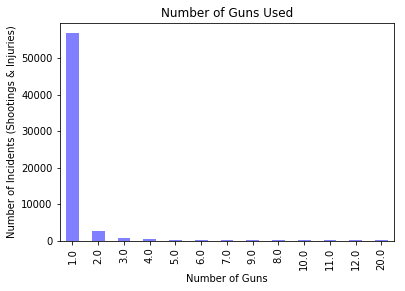

In [91]:
plt.figure(5)
gun_number = gun_df["n_guns_involved"].value_counts()[:20]
plt.tight_layout()
plt.title("Number of Guns Used")
plt.xlabel("Number of Guns")
plt.ylabel("Number of Incidents (Shootings & Injuries)")
gun_number.plot(kind="bar", color='blue', alpha=0.5)
plt.savefig("top_guns.png")

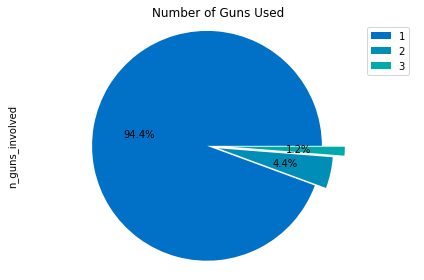

In [94]:
plt.figure(3)
#gun_data = gun_df["n_guns_involved"].value_counts[:3]
#plt.tight_layout()
plt.title("Number of Guns Used")
#gun_data.plot(kind="pie", autopct="%1.1f%%")
#plt.savefig("top_guns.png")
explode = (0, 0.1, 0.2)
colors = ['#0071C6','#008DB8','#00AAAA']#,'#00C69C',]#['#191970','#001CF0','#0038E2','#0055D4',['#0071C6','#008DB8','#00AAAA','#00C69C',]#'#00E28E','#00FF80'] 
gun_df.n_guns_involved.value_counts()[:3].plot(kind='pie', labels=None, fontsize=10, autopct="%1.1f%%", colors=colors, explode=explode)
plt.axis("equal")
plt.legend(loc="best", labels=["1", "2", "3"])
plt.tight_layout()